# ARIMA MODEL FLOW
#--->visualize the time series data
#--->Make the time series data stationary
#--->plot the correlation and autocorrelation charts
#--->construct ARIMA MODEL or Seasonal ARIMA MODEL
#--->USE model to predict

In [28]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
%matplotlib inline

In [29]:
# def remove_rows_between_dates(df, start_date, end_date, Datetime):
#     mask = (raw_df[Datetime] < start_date) | (raw_df[Datetime] > end_date)
#     df = raw_df[mask]
#     return df

df = pd.read_csv('C:/Users/jayap/Downloads/ML Projects/Battery_temperature/BMS_data.csv')

df.drop(df.columns[0], axis=1, inplace=True)
df['Datetime']=pd.to_datetime(df['Datetime']) #converting timestamp data to date_time

# start_date = pd.to_datetime('2022-01-01')
# end_date = pd.to_datetime('2023-12-31')

# df = remove_rows_between_dates(raw_df, start_date, end_date, 'Datetime')

print(len(df))
#df=df.iloc[:5000000]

print(len(df))

df.head()

6512619
6512619


,Voltage_measured,Current_measured,Temperature_measured,Current_charge,Voltage_charge,Time,Datetime,Thermal_runaway
0,3.733794,-0.001752,6.674406,0.0001,-0.010,0.000,2017-01-01 00:00:00,0
1,3.935629,1.496751,6.646307,1.5017,4.740,2.485,2017-01-01 00:00:30,0
2,3.942396,1.496991,6.604969,1.5017,4.753,5.063,2017-01-01 00:01:00,0
3,3.947877,1.498021,6.592867,1.5017,4.753,7.735,2017-01-01 00:01:30,0
4,3.952282,1.496901,6.568163,1.5017,4.765,10.328,2017-01-01 00:02:00,0


In [30]:
df.set_index('Datetime',inplace=True) # making timestamp data as index for easy process of arima model
df.head()

,Voltage_measured,Current_measured,Temperature_measured,Current_charge,Voltage_charge,Time,Thermal_runaway
Datetime,,,,,,,
2017-01-01 00:00:00,3.733794,-0.001752,6.674406,0.0001,-0.010,0.000,0
2017-01-01 00:00:30,3.935629,1.496751,6.646307,1.5017,4.740,2.485,0
2017-01-01 00:01:00,3.942396,1.496991,6.604969,1.5017,4.753,5.063,0
2017-01-01 00:01:30,3.947877,1.498021,6.592867,1.5017,4.753,7.735,0
2017-01-01 00:02:00,3.952282,1.496901,6.568163,1.5017,4.765,10.328,0


In [31]:
df=df[['Current_charge','Voltage_charge','Voltage_measured','Current_measured','Temperature_measured']].resample('H').ffill()
df.head()

,Current_charge,Voltage_charge,Voltage_measured,Current_measured,Temperature_measured
Datetime,,,,,
2017-01-01 00:00:00,0.0001,-0.010,3.733794,-0.001752,6.674406
2017-01-01 01:00:00,1.5023,4.905,4.102958,1.496559,7.139980
2017-01-01 02:00:00,1.5017,4.943,4.141113,1.498426,7.803322
2017-01-01 03:00:00,1.5017,4.968,4.173948,1.500022,8.366303
2017-01-01 04:00:00,1.4209,4.955,4.196760,1.415527,6.630462


In [32]:
print(len(df))

54272


# visualizing the data

<AxesSubplot: xlabel='Datetime'>

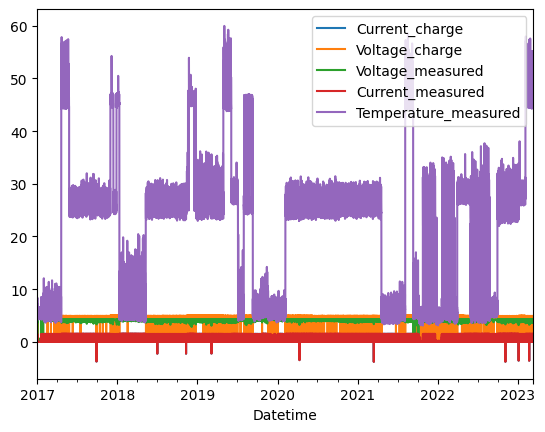

In [33]:
df.plot()

# testing for stationary 

In [34]:
from statsmodels.tsa.stattools import adfuller
test_result=adfuller(df['Temperature_measured'])
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("It is stationary")
    else:
        print("it is non-stationary ")
    
adfuller_test(df['Temperature_measured'])   


ADF Test Statistic : -5.912053519471663
p-value : 2.624787922512359e-07
#Lags Used : 57
Number of Observations Used : 54214
It is stationary


# AUTO REGRESSIVE MODEL 


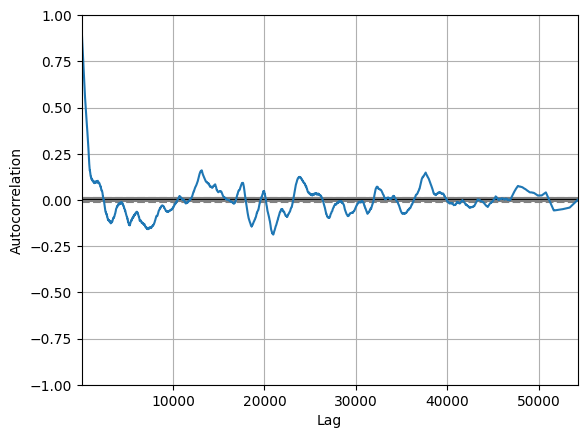

In [35]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Temperature_measured'])
plt.show()

In [36]:
# p,d,q
#P Ar model lags 
#d differencing 
#q moving average lags

In [37]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

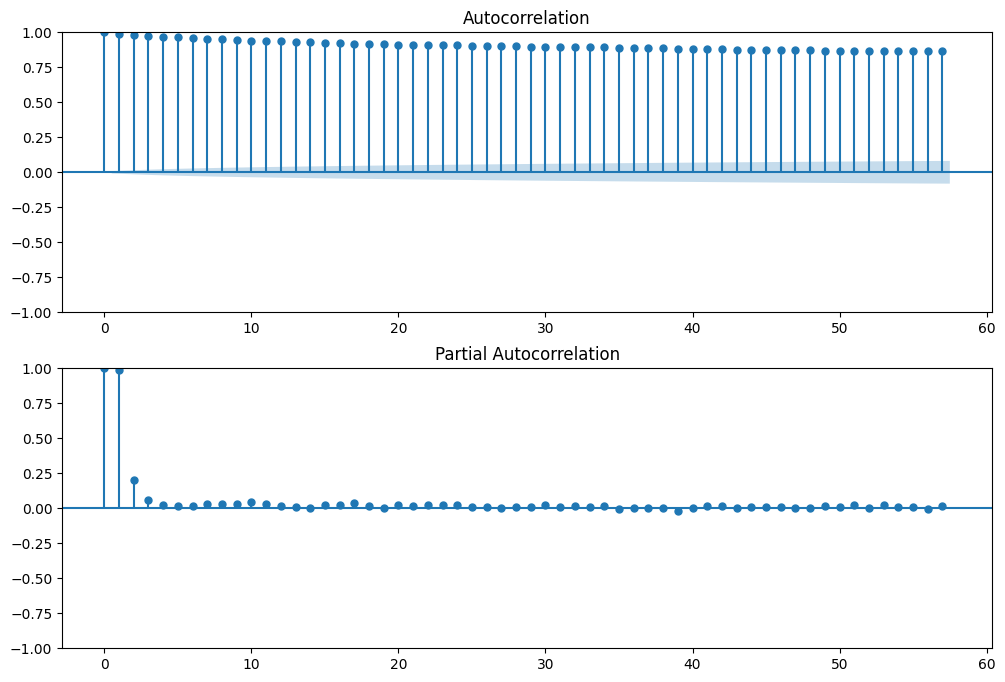

In [38]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Temperature_measured'].iloc[27:],lags=57,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Temperature_measured'].iloc[27:],lags=57,ax=ax2)


In [39]:
#p=1 (partial autocorrelation ),d=0 no differencing , q=1 autocorrelation gradual decrease
from statsmodels.tsa.arima.model import ARIMA

In [40]:
model=ARIMA(df['Temperature_measured'],order=(1,0,1))
model_fit=model.fit()

In [41]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                 
================================================================================
Dep. Variable:     Temperature_measured   No. Observations:                54272
Model:                   ARIMA(1, 0, 1)   Log Likelihood             -107561.452
Date:                  Wed, 06 Sep 2023   AIC                         215130.903
Time:                          21:47:19   BIC                         215166.510
Sample:                      01-01-2017   HQIC                        215142.015
                           - 03-12-2023                                         
Covariance Type:                    opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         21.6103      1.004     21.524      0.000      19.642      23.578
ar.L1          0.9934      0.000   2044.974      0.000       0.992       0.994
ma.L1         -0.2218      0.002   -125.763      0.000      -0.225      -0.218
sigma2         3.0828      0.003    886.662      0.000       3.076       3.090
===================================================================================
Ljung-Box (L1) (Q):                   1.23   Jarque-Bera (JB):          20917106.10
Prob(Q):                              0.27   Prob(JB):                         0.00
Heteroskedasticity (H):               2.76   Skew:                             4.46
Prob(H) (two-sided):                  0.00   Kurtosis:                        98.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [42]:
df['forecast']=model_fit.predict(start=50000,end=54271,dynamic=True)

In [43]:
# Create the traces for each dataframe
trace1 = go.Scatter(x=df['forecast'], y=df['Temperature_measured'], mode='markers', name='Data')
# trace2 = go.Scatter(x=outlier_df['Datetime'], y=outlier_df['forecast'], mode='markers', name='Outliers')

# Create the layout for the graph
layout = go.Layout(title='Coordinates')

# Add the traces to the layout
data = [trace1]

# Create the figure and plot the graph
fig = go.Figure(data=data, layout=layout)
fig.show()
fig.write_image("coordinates.png")

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [ ]:
import statsmodels.api as sm

In [ ]:
model = sm.tsa.statespace.SARIMAX(df['Temperature_measured'], order = (1, 0, 1), seasonal_order = (1,1,1,12))
results = model.fit()

<AxesSubplot: xlabel='Datetime'>

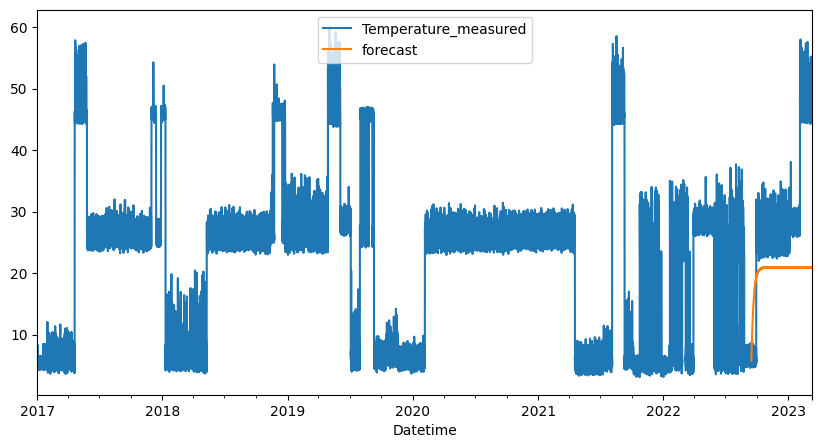

In [ ]:
df['forecast'] = results.predict(start = 50000, end = 54271, dynamic = True)
df[['Temperature_measured', 'forecast']].plot(figsize=(10,5))

In [ ]:
from pandas.tseries.offsets import DateOffset
future_dates = [df.index[-1]+ DateOffset(months = x) for x in range(0,24)]

In [ ]:
future_dates_df = pd.DataFrame(index = future_dates[1:], columns=df.columns)

In [ ]:
future_dates_df.tail()

,Current_charge,Voltage_charge,Voltage_measured,Current_measured,Temperature_measured,forecast
2024-10-12 07:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2024-11-12 07:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2024-12-12 07:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2025-01-12 07:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2025-02-12 07:00:00,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
future_df = pd.concat([df,future_dates_df])

<AxesSubplot: >

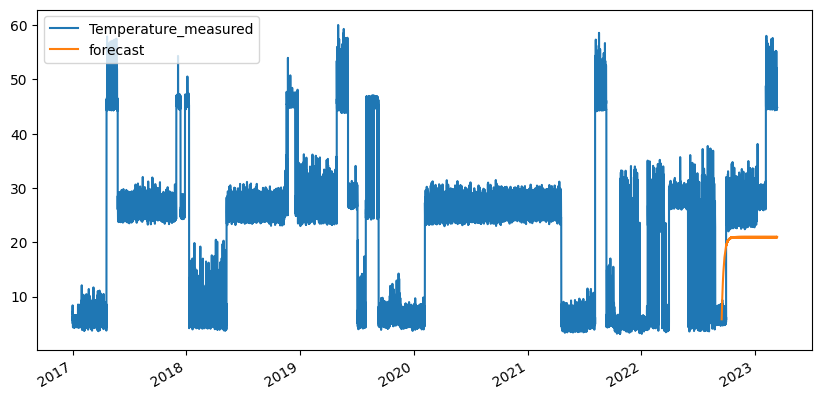

In [ ]:
future_df['forecast'] = results.predict(start = 50000, end = 54272, dynamic = True)
future_df[['Temperature_measured', 'forecast']].plot(figsize= (10,5))